### Binary classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### conver in pytorch

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([569, 31])

In [6]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


### split

In [7]:
ratios = [.6, .2, .2]

In [8]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print(f'train_cnt: {train_cnt}    valid_cnt: {valid_cnt}    test_cnt: {test_cnt}')

train_cnt: 341    valid_cnt: 113    test_cnt: 115


In [9]:
indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


### preprocessing

In [10]:
scaler = StandardScaler()
scaler.fit(x[0].numpy())

x = [torch.from_numpy(scaler.transform(x[0].numpy())).float(),
     torch.from_numpy(scaler.transform(x[1].numpy())).float(),
     torch.from_numpy(scaler.transform(x[2].numpy())).float()]

df = pd.DataFrame(x[0].numpy(), columns=cancer.feature_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
336,-0.665507,-0.215351,-0.651245,-0.652157,1.228965,-0.038351,-0.197884,-0.342403,-0.054236,0.355363,...,-0.612120,0.585793,-0.614875,-0.592381,1.561583,0.112037,0.118715,0.130117,-0.146514,0.463326
337,-0.347571,-0.590169,-0.347278,-0.419136,1.110881,0.158212,-0.601557,-0.467926,1.082939,0.506212,...,-0.339254,-0.634911,-0.371298,-0.414032,0.639522,-0.361756,-0.636823,-0.516311,0.305061,0.134456
338,-0.307471,-0.820119,-0.282261,-0.353788,-1.273016,-0.154323,0.318413,-0.366739,-1.369651,-0.501402,...,-0.453816,-0.967682,-0.416593,-0.463670,-1.448752,-0.126599,0.364135,-0.184108,-1.521688,-0.736441
339,-0.307471,-1.185740,-0.246232,-0.366399,-0.618695,0.608341,0.646160,-0.215598,-0.785021,0.192797,...,-0.351751,-1.290714,-0.030229,-0.387906,-0.317170,2.330719,2.647943,0.666332,-0.431091,2.097322
340,-0.235864,0.338829,-0.203577,-0.295604,-0.677736,0.103174,0.280450,-0.335998,-0.906225,-0.376915,...,-0.266350,-0.031052,-0.153218,-0.300821,0.102735,0.730541,0.968565,0.072274,-0.560600,-0.098799


### Build Model optimizer

In [11]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),
    nn.LeakyReLU(),
    nn.Linear(25, 20),
    nn.LeakyReLU(),
    nn.Linear(20, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 5),
    nn.LeakyReLU(),
    nn.Linear(5, y[0].size(-1)),
    nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
  (11): Sigmoid()
)

In [12]:
optimizer = optim.Adam(model.parameters())

### Train

In [13]:
n_epochs = 10000
batch_size = 32
early_stop = 1000
print_interval = 100

In [14]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [15]:
train_history, valid_history = [], []

for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()        
        train_loss += float(loss) # This is very important to prevent memory leak.

    train_loss = train_loss / len(x_)
        
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(x_)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
        
    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

Epoch 100: train loss=2.1972e-04  valid_loss=1.0069e+00  lowest_loss=1.4835e-01
Epoch 200: train loss=3.5182e-05  valid_loss=1.0686e+00  lowest_loss=1.4835e-01
Epoch 300: train loss=1.0231e-05  valid_loss=1.7458e+00  lowest_loss=1.4835e-01
Epoch 400: train loss=4.0837e-06  valid_loss=2.4088e+00  lowest_loss=1.4835e-01
Epoch 500: train loss=1.8879e-06  valid_loss=2.4141e+00  lowest_loss=1.4835e-01
Epoch 600: train loss=8.8006e-07  valid_loss=2.4190e+00  lowest_loss=1.4835e-01
Epoch 700: train loss=4.6776e-07  valid_loss=2.4237e+00  lowest_loss=1.4835e-01
Epoch 800: train loss=2.3007e-07  valid_loss=2.4281e+00  lowest_loss=1.4835e-01
Epoch 900: train loss=1.1334e-07  valid_loss=2.4324e+00  lowest_loss=1.4835e-01
Epoch 1000: train loss=5.8419e-08  valid_loss=2.4364e+00  lowest_loss=1.4835e-01
There is no improvement during last 1000 epochs.
The best validation loss from epoch 15: 1.4835e-01


<All keys matched successfully>

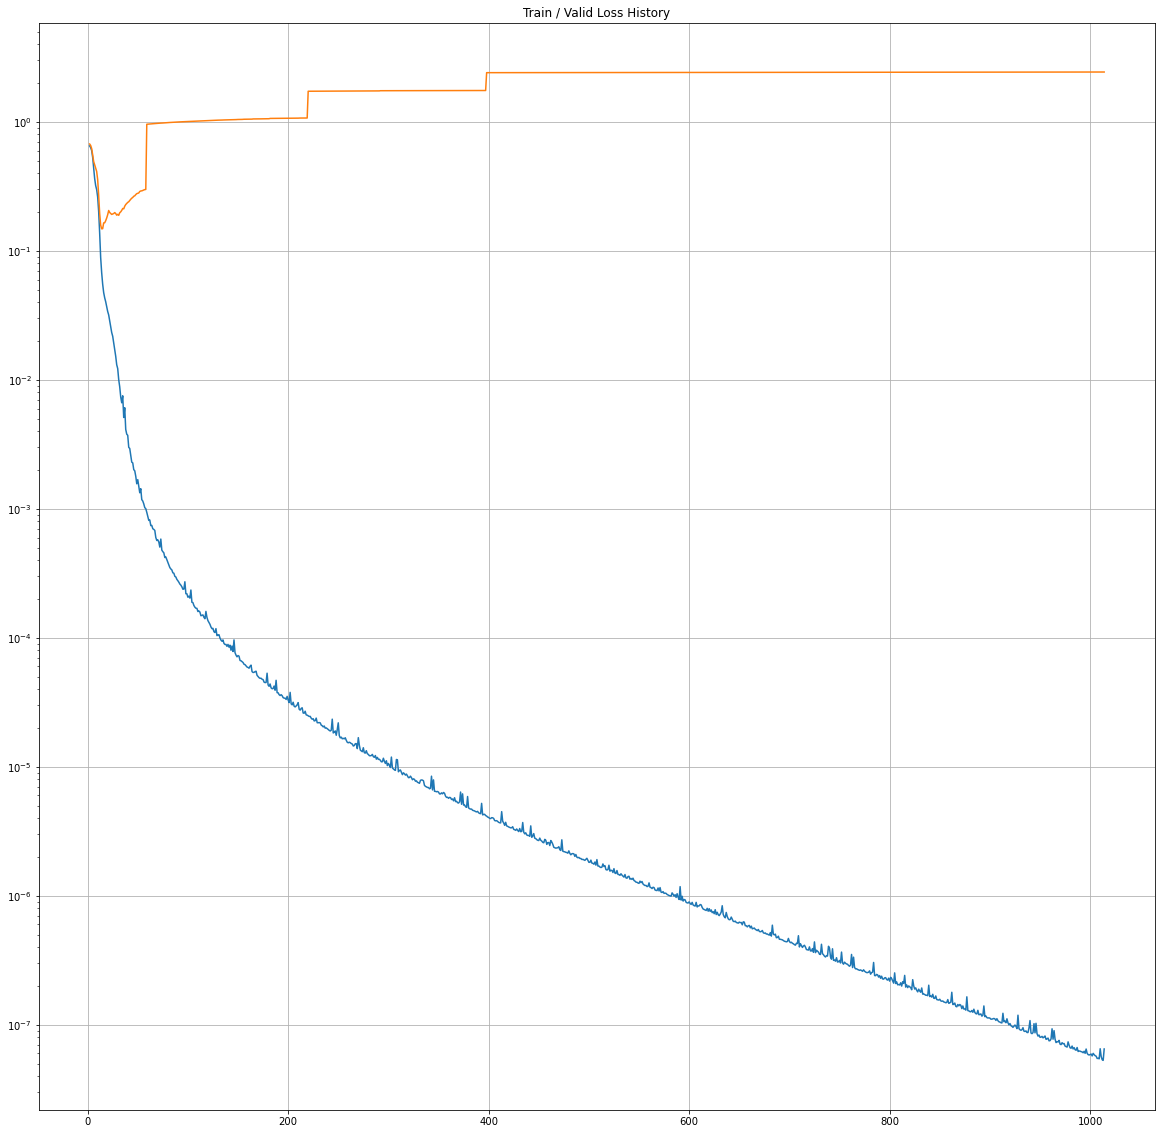

In [16]:
plot_from = 2

plt.figure(figsize=(20, 20))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:]
)
plt.yscale('log')
plt.show()

In [17]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss
    
        y_hat += [y_hat_i]

    
test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)


print("Test_loss: %.4e" % test_loss)

Test_loss: 5.6664e-02


In [19]:
correct_cnt = (y[2] == (y_hat > .5)).sum()
total_cnt = float(y[2].size(0))

print(f'Accuracy: {correct_cnt/total_cnt}')

Accuracy: 0.991304337978363


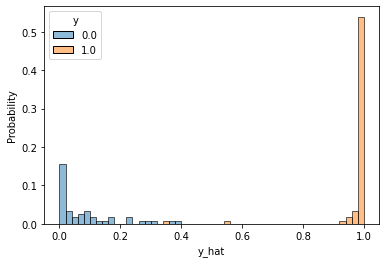

In [23]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df.values[:, 0], df.values[:, 1])

0.9993597951344431